In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
import os
print(os.getcwd())

C:\Users\Cheng\OneDrive\Documents\Proj\VarianceArithemtic\IPyNb


In [3]:
df = pd.read_csv("../Cpp/Output/LogVar.txt", sep='\t')
df.head()

,NoiseType,Noise,X,log,Error Deviation,Error Minimum,Error Maximum,Value Deviation,Uncertainty,Mean,...,1.1,1.3,1.5,1.7,1.9,2.1,2.3,2.5,2.7,2.9
0,Uniform,0.2,0.5,-0.693147,6.524420e-16,-1.675880e-15,7.472870e-16,0.459515,7.043000e+14,-0.095331,...,0.100000,0.082900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Gaussian,0.2,1.0,0.000000,1.003420e+00,-6.520240e+00,3.103430e+00,0.212731,2.120050e-01,-0.019434,...,0.052833,0.040532,0.026517,0.015527,0.007461,0.004739,0.001008,0.000403,0.000101,0.000000
2,Uniform,0.2,1.0,0.000000,9.714970e-01,-2.005970e+00,1.402750e+00,0.205962,2.120050e-01,-0.020800,...,0.073000,0.076100,0.057200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Gaussian,0.2,2.0,0.693147,1.003860e+00,-4.631980e+00,3.772390e+00,0.101688,1.012980e-01,-0.004060,...,0.047088,0.038956,0.026707,0.020482,0.011145,0.006325,0.003514,0.002209,0.000803,0.000301
4,Uniform,0.2,2.0,0.693147,9.942690e-01,-1.877620e+00,1.576640e+00,0.100717,1.012980e-01,-0.005063,...,0.064700,0.065900,0.067300,0.012300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [4]:
sorted(df['Noise'].unique())

[1e-17,
 1e-16,
 1e-15,
 1e-14,
 1e-13,
 1e-12,
 1e-11,
 1e-10,
 1e-09,
 1e-08,
 1e-07,
 1e-06,
 1e-05,
 0.0001,
 0.001,
 0.01,
 0.1,
 0.2]

In [5]:
sNoise=sorted(df[df['Noise'] > 1e-5]['Noise'].unique())

# Deviation vs Uncertainty

In [6]:
def PlotValues( sValue=['Value Deviation', 'Uncertainty'], 
                sNoise=sNoise, noiseType='Gaussian',
                sStyle=['x', '-', '--', '+'], sColor = ['r','g','b','y','c','m'],
                logx=True, logy=True, xlim=[], ylim=[]):
    fig, ax = plt.subplots()
    if logx:
        ax.set_xscale('log')
    if logy:
        ax.set_yscale('log')
    if ylim:
        ax.set_ylim(ylim)
    ax.set_title('log(x +/- noise)')
    ax.set_xlabel('x')
    ax.set_ylabel(' or '.join(sValue))
    plt.grid(True)
    for noise, color in zip(sNoise, sColor):
        for value, style in zip(sValue, sStyle):
            dfPlot = df[(df['NoiseType']==noiseType) & (df['Noise']==noise)]
            if dfPlot.empty:
                continue
            ax.plot(dfPlot['X'], dfPlot[value], ''.join([color, style]), label=f'{noise} {value}')
    ax.legend(bbox_to_anchor=(1.1, 1.05))

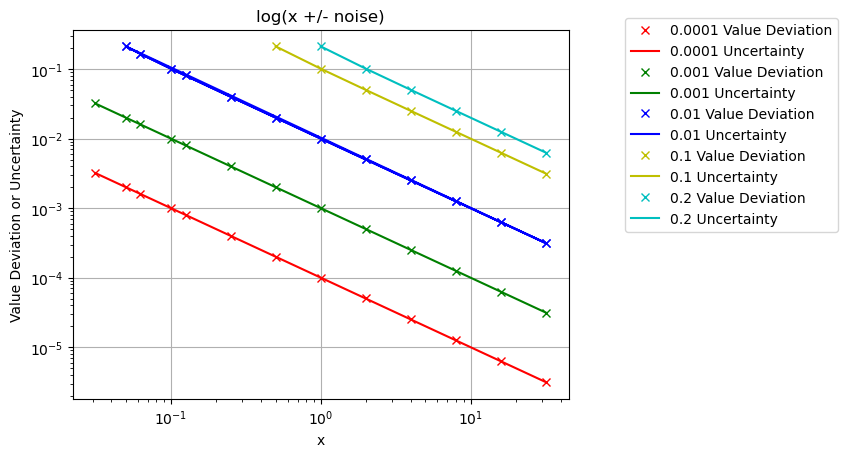

In [7]:
PlotValues()

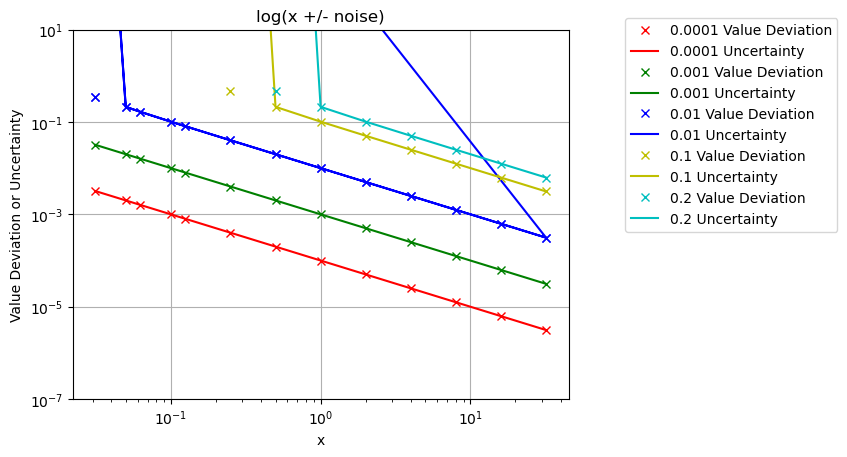

In [8]:
PlotValues(noiseType='Uniform', ylim=[1e-7, 1e1])

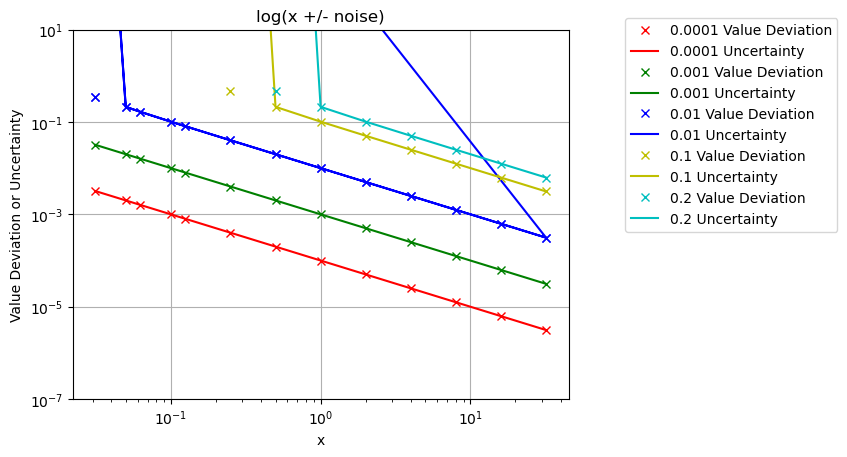

In [9]:
PlotValues(ylim=[1e-7, 1e1], noiseType='Uniform')

In [10]:
def PlotErrorDev( noiseType='Gaussian', sNoise=sNoise,
                  sColor = ['r','g','b','y','c','m'], ylim=(1e-6, 1e1) ):
    
    fig, ax = plt.subplots()
    ax.set_title(r'$\log(x \pm \delta x)$ with ' + noiseType + ' noise')
    ax.set_xlabel('x')
    ax.set_xscale('log')
    ax.set_ylabel('Uncertainty or Value Deviation')
    ax.set_yscale('log')
    ax.set_ylim(ylim)
    plt.grid(True)
    for noise, color in zip(sNoise, sColor):
        dfPlot = df[(df['NoiseType']==noiseType) & (df['Noise']==noise)]
        if dfPlot.empty:
            continue
        ax.plot(dfPlot['X'], dfPlot['Uncertainty'], ''.join([color, '-']), label=f'{noise} Uncertainty')
        ax.plot(dfPlot['X'], dfPlot['Value Deviation'], ''.join([color, 'x']), label=f'{noise} Value Deviation')

    ax2 = ax.twinx()
    ax2.set_xscale('log')
    ax2.set_ylabel('Error Deviation')
    for noise, color in zip(sNoise, sColor):
        dfPlot = df[(df['NoiseType']==noiseType) & (df['Noise']==noise)]
        if dfPlot.empty:
            continue
        ax2.plot(dfPlot['X'], dfPlot['Error Deviation'], ''.join([color, '--']), label=f'{noise} Error Deviation')

    ax.legend(bbox_to_anchor=(1.57, 1.0))
    ax2.legend(bbox_to_anchor=(1.57, 0.3))

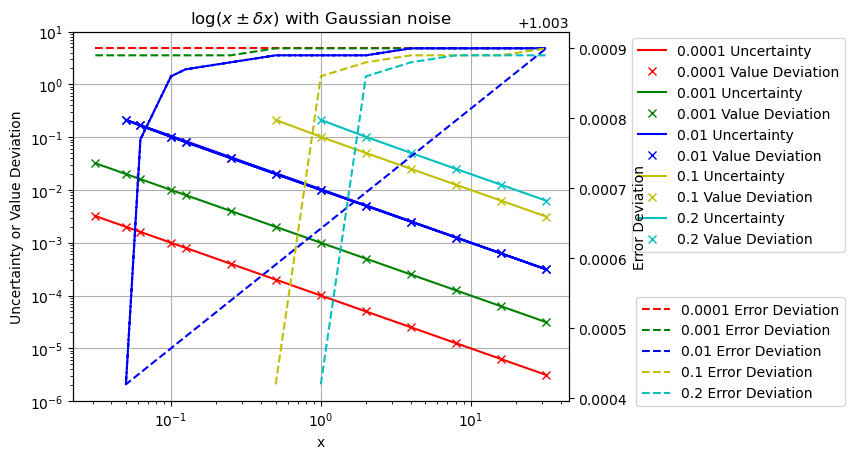

In [11]:
PlotErrorDev()

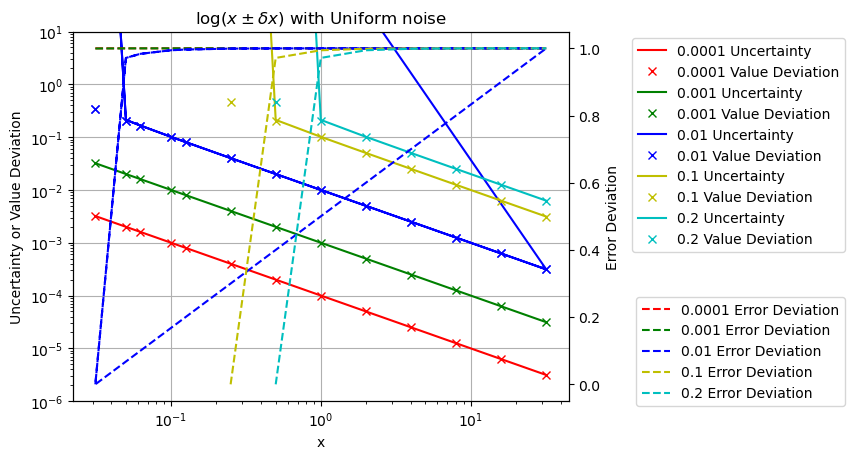

In [12]:
PlotErrorDev('Uniform')

# Mean vs Bias 

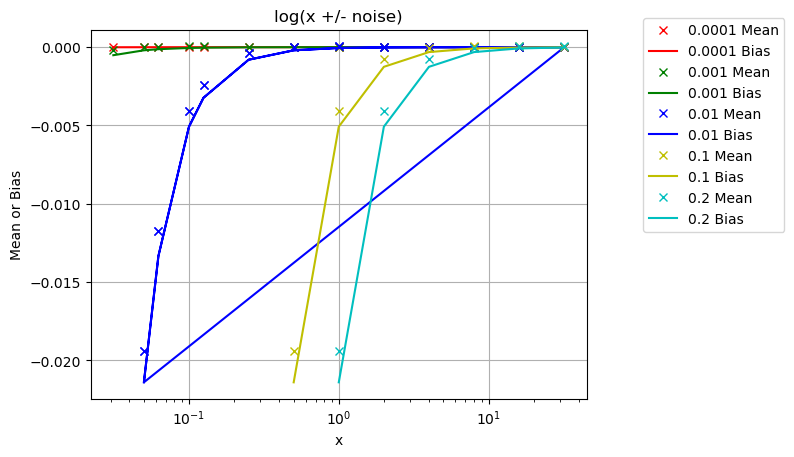

In [13]:
PlotValues(sValue=['Mean', 'Bias'], sStyle=['x', '-'], logy=False)

# Error Maximum and Minimum

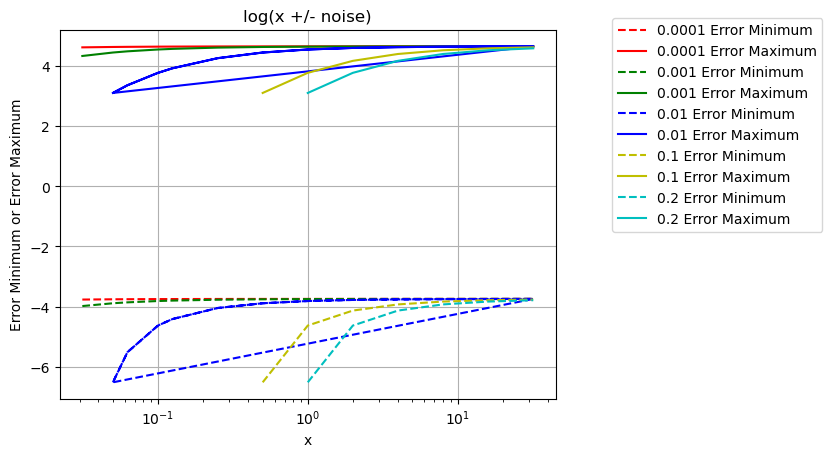

In [14]:
PlotValues(sValue=['Error Minimum', 'Error Maximum'], sStyle=['--', '-'], logy=False)

# Histogram

In [15]:
sHisto = [str(i/10) for i in range(-29, 30, 2)]
df[sHisto].head()

,-2.9,-2.7,-2.5,-2.3,-2.1,-1.9,-1.7,-1.5,-1.3,-1.1,...,1.1,1.3,1.5,1.7,1.9,2.1,2.3,2.5,2.7,2.9
0,0.000000,0.000000,0.000000,0.017100,0.023000,0.025200,0.027600,0.030300,0.033100,0.036400,...,0.100000,0.082900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.001613,0.004840,0.005445,0.008066,0.010284,0.012099,0.015729,0.022384,0.028030,0.035995,...,0.052833,0.040532,0.026517,0.015527,0.007461,0.004739,0.001008,0.000403,0.000101,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.032400,0.041100,0.042700,0.044600,0.046400,...,0.073000,0.076100,0.057200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.002209,0.002811,0.004719,0.007631,0.011044,0.012349,0.018374,0.024900,0.030723,0.039960,...,0.047088,0.038956,0.026707,0.020482,0.011145,0.006325,0.003514,0.002209,0.000803,0.000301
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.009200,0.048800,0.049700,0.050800,0.051800,...,0.064700,0.065900,0.067300,0.012300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [16]:
def PlotHisto( sNoiseType=['Gaussian'], sNoise=df['Noise'].unique(), sX=df['X'].unique() ):
    df['algo'] = df['NoiseType'] + " " + df['Noise'].astype(str) + " " + df['X'].astype(str)
    dfPlot = df[(df['NoiseType'].isin(sNoiseType)) & (df['Noise'].isin(sNoise)) & (df['X'].isin(sX))].set_index('algo')
    # return dfPlot
    ax = dfPlot[sHisto].T.plot()
    ax.legend(bbox_to_anchor=(1.1, 1.05))    


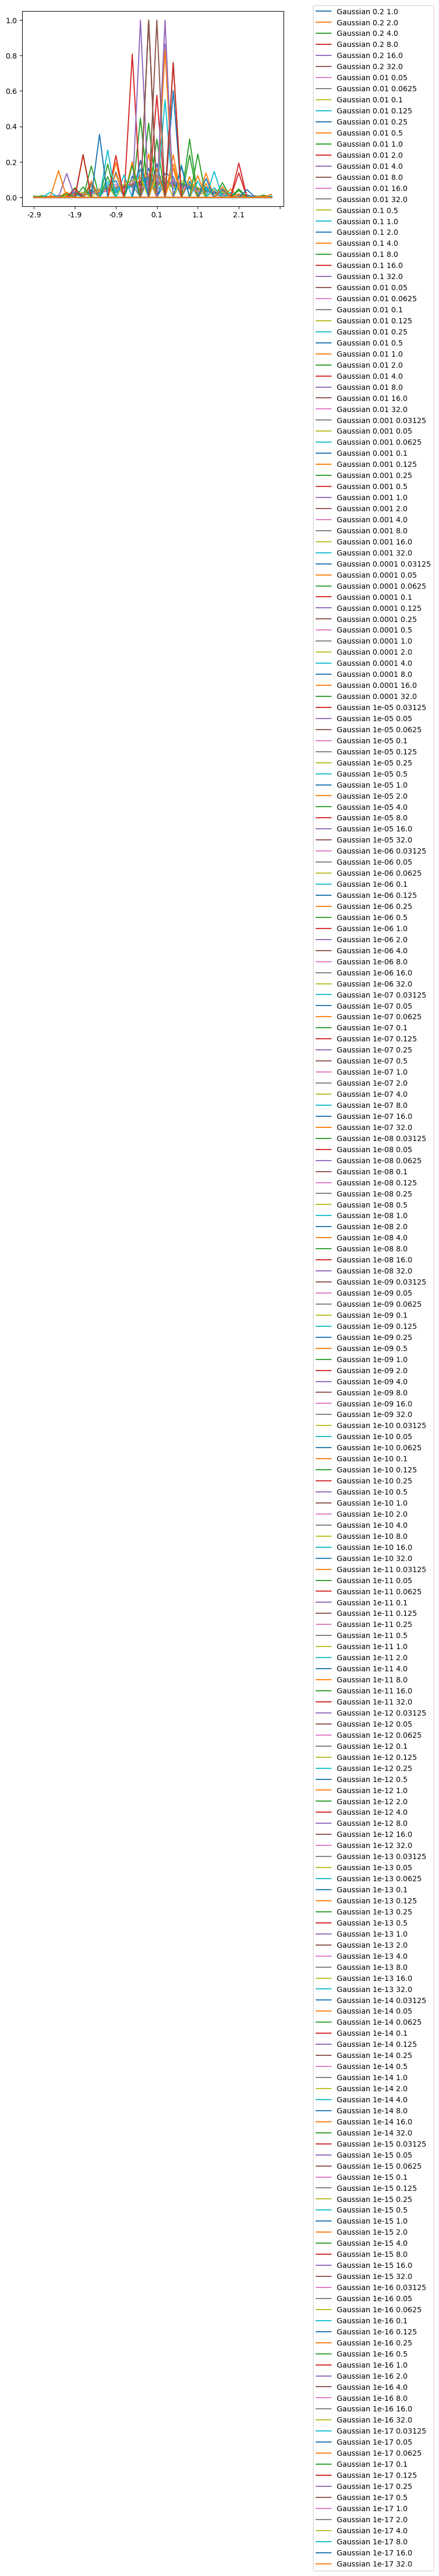

In [17]:
PlotHisto(sNoiseType=['Gaussian'])

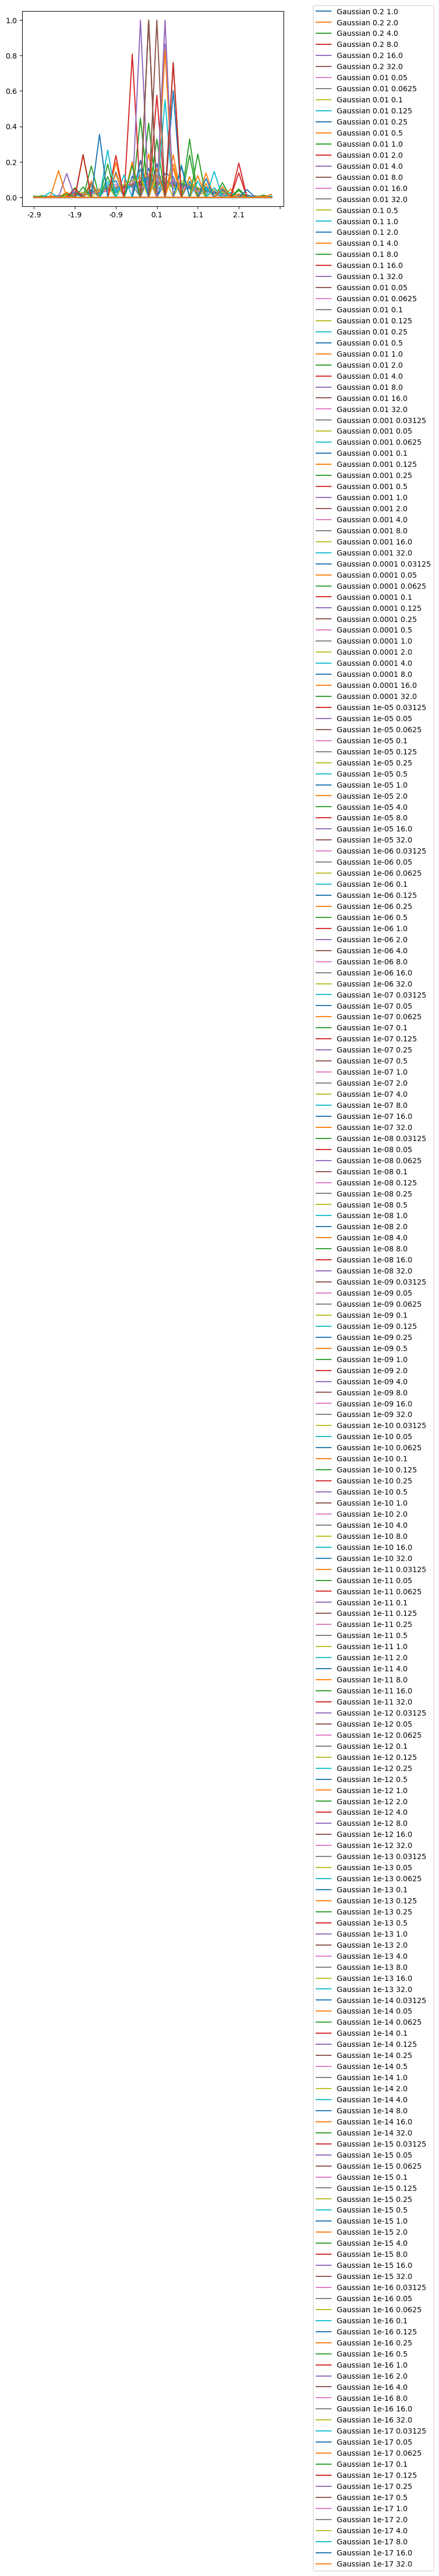

In [18]:
PlotHisto()

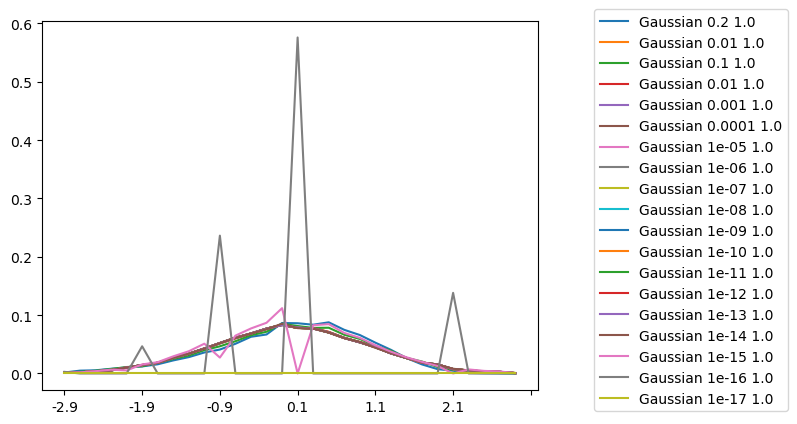

In [19]:
PlotHisto(sX=[1])

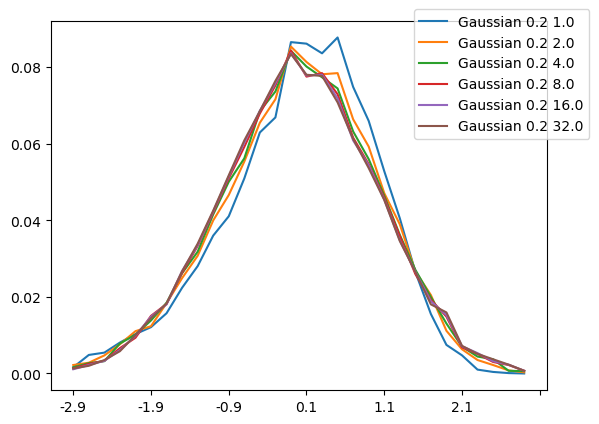

In [20]:
PlotHisto(sNoise=[0.2])